# Сравнение цен и стоимости жизни в городах разных стран и континентов
## Гипотезы:
1. Цены на продукты питания в Европе выше, чем на других континентах
2. Средняя зарплата зависит от населения
3. Рестораны и развлечения в столицах дороже
4. В регионе выплатить ипотеку легче
5. Цены на сигареты и алкоголь зависят от континента
6. В России уровень жизни ниже, чем в других странах(в финансовом плане)

Чтобы проверить наши гипотезы мы решили взять наиболее развитые страны. Все объекты нашей выборки - города стран большой двадцатки. Мы взяли страны, которые представляют наибольший интерес для нас.
#### В нашем исследовании мы собираемся опираться на следующие категории:

1. Цены на посещение кафе и ресторанов
2. Цены на продукты питания
3. Транспорт
4. Коммунальные услуги, в месяц
5. Спорт и отдых
6. Зарплата и финансирование
7. Затраты на детей
8. Одежда и обувь
9. Цены на аренду жилья, в месяц
10. Цены на покупку квартиры

## Часть первая - Парсинг

In [1]:
# Библиотеки для парсинга

import requests
from bs4 import BeautifulSoup

# Функция, собирающая данные

def parser(countries, cities):
    
    # Функция вернет список словарей result
    
    result = []
    
    # Эти циклы идут по спискам стран и городов, к каждой стране относится 15 городов
    # Для первой страны первые 15 городов из списка, для второй следующие 15 городов
    
    for i in range(len(countries)):
        
        for j in range(i * 15, (i + 1) * 15):
            
            # Ссылка меняется в зависимости от страны и города
            
            url = 'https://ru.traveltables.com/country/' + countries[i] + '/city/' + cities[j] + '/cost-of-living/'
            
            # Занесем в список expenses нужную информацию для каждого из городов

            response = requests.get(url)

            tree = BeautifulSoup(response.content, 'html.parser')

            expenses = tree.find_all('div', {'class' : 'row my-2 g-row'})

            # Идем по каждому из городов и создаем словарь, где ключ - вид услуги, значение - цена услуги  
                
            d = {}

            for m in expenses:
                if m.find('div', {'class' : 'col-md-7 col-11 m-md-0 p-md-0 m-auto p-4 text-md-left col-good-title'}).text[1:-1] != 'Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка':
                    d[m.find('div', {'class' : 'col-md-7 col-11 m-md-0 p-md-0 m-auto p-4 text-md-left col-good-title'}).text[1:-1]] = int(m.find('span', {'class' : 'price-convert'}).text[1:-4].replace(',', '.').replace('.', ''))
                else:
                    d[m.find('div', {'class' : 'col-md-7 col-11 m-md-0 p-md-0 m-auto p-4 text-md-left col-good-title'}).text[1:-1]] = float(m.find('div', {'class' : 'col-md-2 col-7 m-auto text-center text-md-right col-price'}).text[1:-3])
            people = tree.find_all('div', {'class' : 'col-12 col-md-6 order-1 order-md-2 mb-5'})
            for n in people:
                d['Население'] = n.find('p').text.split(' ')[-9]    
            result.append(d)   
            
    # После завершения всех циклов получим список словарей,
    # где каждый словарь - информация о ценах на разные услуги в каждом городе
    
    return result

In [2]:
# Создадим список countries, с интересующими нас странами

countries = ['russia', 'france', 'germany', 'italy', 'united-kingdom', 'united-states',
             'turkey', 'south-africa', 'sweden', 'ukraine', 'spain', 'canada',
             'australia', 'china', 'brazil', 'india', 'japan', 'mexico', 'portugal', 'greece']

# Создадим список cities, с интересующими нас городами этих стран

cities = ['moscow', 'saint-petersburg', 'kazan', 'yekaterinburg', 'sochi', 
          'nizhny-novgorod', 'novosibirsk', 'chelyabinsk', 'krasnoyarsk', 'tyumen', 'volgograd', 'ufa', 
          'krasnodar', 'perm', 'rostov-na-donu', 'paris', 'marseille', 'lyon', 'toulouse', 'saint-etienne', 'nantes',
          'strasbourg', 'montpellier', 'bordeaux', 'lille', 'rennes', 'reims', 'le-havre', 'toulon', 'grenoble',
          'berlin', 'hamburg', 'munich', 'cologne', 'frankfurt', 'stuttgart', 'dusseldorf', 'dortmund',
          'leipzig', 'bremen', 'dresden', 'hanover', 'essen', 'la-beck', 'nuremberg', 'rome', 'milan', 'palermo', 
          'florence', 'venice', 'naples', 'turin', 'catania', 'verona', 'messina',
          'trieste', 'padova', 'bari', 'parma', 'modena', 'london-1', 'birmingham', 'manchester', 'leeds','liverpool',
          'sheffield', 'oxford', 'nottingham', 'bristol', 'coventry', 'glasgow', 'newcastle-upon-tyne', 'bradford', 
          'york', 'leicester', 'los-angeles-ca', 'chicago-il', 'washington-dc', 'san-francisco-ca', 'boston-ma', 
          'philadelphia-pa', 'las-vegas-nv', 'houston-tx', 'san-diego-ca', 'phoenix-az', 'denver-co', 'detroit-mi', 
          'san-jose-ca', 'new-york-ny', 'dallas-tx', 'istanbul', 'ankara', 'alanya', 'bodrum', 'gaziantep', 'izmir',
          'marmaris', 'antalya', 'side', 'konya', 'bursa', 'fethiye', 'adana', 'mersin', 'trabzon',
          'cape-town', 'east-london', 'emalahleni', 'george', 'johannesburg', 'midrand', 'paarl', 'potchefstroom',
          'pretoria', 'randburg', 'secunda', 'tembisa', 'umlazi', 'vanderbijlpark', 'grahamstown',
          'stockholm', 'gothenburg', 'trollhattan', 'uppsala', 'boras', 'vasteras', 'orebro', 'linkoping', 'helsingborg',
          'skovde', 'karlstad', 'norrkoping', 'lund', 'skara', 'umea', 'kiev', 'kharkiv', 'odesa', 'dnipropetrovsk',
          'donetsk', 'zaporizhzhya', 'lviv', 'kryvyy-rih', 'mykolayiv', 'mariupol', 'cherkasy', 'kherson', 'vinnytsya',
          'poltava', 'chernihiv', 'madrid', 'barcelona', 'valencia', 'sevilla', 'zaragoza-saragossa', 'malaga', 'murcia', 
          'palma-de-mallorca', 'las-palmas', 'bilbao', 'alicante', 'cordoba-1', 'valladolid', 'vigo', 'gijon', 
          'toronto', 'montreal', 'calgary', 'newmarket-on', 'edmonton', 'mississauga', 'winnipeg', 'vancouver', 'hamilton-1',
          'quebec-city', 'brampton', 'saanich', 'halifax', 'laval', 'london', 'sydney', 'melbourne', 'brisbane', 'perth',
          'adelaide', 'gold-coast', 'toowoomba', 'canberra', 'sunshine-coast', 'wollongong', 'geelong', 'hobart',
          'townsville', 'cairns', 'darwin', 'shanghai', 'beijing', 'xi-an', 'dalian', 'tianjin', 'changchun', 'guangzhou', 
          'chongqing', 'hangzhou', 'nanchang', 'taiyuan', 'jinan', 'nanjing', 'changsha', 'harbin', 'sao-paulo', 'rio-de-janeiro', 
          'brasilia', 'salvador', 'fortaleza', 'belo-horizonte', 'manaus', 'sao-bernardo-do-campo', 'recife', 'nova-friburgo', 'belem', 
          'porto-alegre', 'guarulhos', 'campo-grande', 'ribeirao-preto', 'mumbai', 'visakhapatnam', 'bangalore', 'patna', 'ahmedabad',
          'chennai', 'kolkata', 'surat', 'pune', 'jaipur', 'lucknow-lakhnau', 'kanpur', 'nagpur', 'indore', 'thane',
          'tokyo', 'yokohama', 'osaka', 'nagoya', 'sapporo', 'kobe', 'kyoto', 'fukuoka', 'kawasaki', 'saitama', 'hiroshima',
          'sendai', 'kitakyushu', 'chiba', 'sakai', 'mexico-city', 'ecatepec', 'tijuana', 'puebla', 'queretaro',
          'ciudad-juarez', 'leon', 'zapopan', 'aguascalientes', 'naucalpan', 'merida', 'san-luis-potosi', 'toluca', 'chihuahua', 'villahermosa',
          'lisbon', 'porto', 'vila-nova-de-gaia', 'braga', 'funchal', 'almada', 'coimbra', 'setubal', 'aveiro', 'faro', 'guimaraes', 'evora',
          'viseu', 'ponta-delgada', 'leiria', 'athens', 'thessaloniki', 'patras', 'heraklion', 'larissa', 'volos', 'xanthi', 'chania', 'ioannina', 
          'chalcis', 'trikala', 'agrinio', 'katerini', 'kalamata', 'alexandroupolis']

In [3]:
# Получим список словарей

info = parser(countries, cities)

In [4]:
# Сделаем датафрэйм df из нашего списка словарей, в качестве индексов будут выступать города

import pandas as pd
import numpy as np

idx = np.arange(len(info))

df = pd.DataFrame(info, index = idx)

df

,Питание в недорогом ресторане,"Питание для 2 человек, Ресторан среднего уровня, три блюда",Мак меню в McDonalds или альтернативном фастфуде,"Домашнее пиво, 0,5 литра","Импортированное пиво, 0,33-литровая бутылка",Капучино,"Coca-Cola, 0,33-литровая банка","Вода, 0,33-литровая бутылка","Молоко, обычное, 1 литр","Буханка свежего белого хлеба, 0,5 кг",...,Летнее платье в магазине брендовой одежды,"Пара кроссовок, средняя цена",Пара кожаной обуви,"Квартира, 1 спальня, в центре города","Квартира, 1 спальня, Вне центра города","Квартира, 3 спальни, в центре города","Квартира, 3 спальни, Вне центра города",Цена за м2 на покупку квартиры в центре города,Цена за м2 на покупку квартиры за пределами центра города,Население
0,705,3021,302,201,125,171,60,44,69,42,...,3269,6441,8483,65716.0,35682.0,133489.0,67030.0,411007.0,189104.0,12500123
1,503,2013,302,201,128,146,57,40,65,50,...,2757,5741,7346,37487.0,25328.0,75353.0,47173.0,189392.0,114760.0,5028000
2,403,2013,262,150,112,123,51,23,55,35,...,2599,5129,5834,23664.0,16524.0,38015.0,26937.0,119665.0,78783.0,1243500
3,452,2013,226,71,101,115,49,31,52,32,...,2658,5289,6316,23820.0,16555.0,39778.0,28468.0,97923.0,65589.0,1468833
4,614,2517,302,75,110,146,58,37,64,32,...,3587,5727,6545,34742.0,23619.0,62310.0,41539.0,177779.0,106996.0,411524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,900,2476,562,315,315,282,146,45,103,80,...,1351,6153,4502,27014.0,22512.0,40521.0,31516.0,117062.0,92299.0,61653
296,900,3601,562,315,315,282,224,45,119,80,...,2475,6078,7654,21011.0,16208.0,33018.0,29115.0,81043.0,81043.0,46899
297,1080,2566,765,292,141,304,164,55,96,72,...,3039,6843,7924,20110.0,18610.0,31516.0,28515.0,99052.0,90048.0,55997
298,720,2791,540,292,189,266,139,41,105,89,...,2476,6303,9605,27689.0,20110.0,36019.0,36019.0,135072.0,180096.0,54100


## Часть вторая - Предварительная обработка, создание новых признаков

In [5]:
# Создадим дополнительные признаки: город и страна

df['Страна'] = ''
df['Город'] = ''
for i in range(len(countries)):
    for j in range(i * 15, (i + 1) * 15):
        df.loc[j, 'Страна'] = countries[i]
        df.loc[j, 'Город'] = cities[j]        

In [6]:
# Проверка пропущенных значений

df.isnull().sum()

Питание в недорогом ресторане                                                                                            0
Питание для 2 человек, Ресторан среднего уровня, три блюда                                                               0
Мак меню в McDonalds или альтернативном фастфуде                                                                         0
Домашнее пиво, 0,5 литра                                                                                                 0
Импортированное пиво, 0,33-литровая бутылка                                                                              0
Капучино                                                                                                                 0
Coca-Cola, 0,33-литровая банка                                                                                           0
Вода, 0,33-литровая бутылка                                                                                              0
Молоко, обычное,

Мы видим, что есть пропущенные значения, от них стоит избавиться. Правильней будет заполнить пропуски не средним по столбцу, а средним по столбцу для каждой страны отдельно. Т.е мы найдем пропущенное значение в определенном столбце определенного города. Найдем все остальные города из этой страны, значения которых в этом столбце не пропущенны и заполним их средним.

In [7]:
# Функция для заполнения пустого значения города в определенном столбце средним значеним других городов этой страны


def fill_null(indexes, column):

     # Пойдем по всем строкам с пропущенными значениями в этом столбце

    for i in indexes:
        
        # Выбираем из датасета все города страны, которая соответсвует стране города у которого пропущенно значение в этом столбце
        
        res_idx1 = df[df['Страна'] == df.loc[i, 'Страна']].index
        
        # Выбираем из датасета все непропущенные значения данного столбца
        
        res_idx2 = df[df[column].isnull() == False].index
        
        # Получим города, соответсвующие стране города у которого пропущенно значение в этом столбце и у которых значение не пропущенно
        
        res_idx3 = set(res_idx1).intersection(set(res_idx2))
        
        # Приравняем пропущенному значению их среднее
        df.loc[i, column] = df.loc[res_idx3, column].mean()

In [8]:
# Пойдем по всем столбцам

for column in df.columns:
    
    # Индексы строк, которые имеют пропущенное значение в этом столбце
    
    null_value_idx = df[df[column].isnull() == True].index
    
    fill_null(null_value_idx, column)

In [9]:
# Проверка на пропуски после обработки

df.isnull().sum()

Питание в недорогом ресторане                                                                                           0
Питание для 2 человек, Ресторан среднего уровня, три блюда                                                              0
Мак меню в McDonalds или альтернативном фастфуде                                                                        0
Домашнее пиво, 0,5 литра                                                                                                0
Импортированное пиво, 0,33-литровая бутылка                                                                             0
Капучино                                                                                                                0
Coca-Cola, 0,33-литровая банка                                                                                          0
Вода, 0,33-литровая бутылка                                                                                             0
Молоко, обычное, 1 литр 

Мы грамотно обработали все пропуски:)

In [10]:
# Анализ типа столбцов

df.dtypes

Питание в недорогом ресторане                                                                                             int64
Питание для 2 человек, Ресторан среднего уровня, три блюда                                                                int64
Мак меню в McDonalds или альтернативном фастфуде                                                                          int64
Домашнее пиво, 0,5 литра                                                                                                  int64
Импортированное пиво, 0,33-литровая бутылка                                                                               int64
Капучино                                                                                                                  int64
Coca-Cola, 0,33-литровая банка                                                                                            int64
Вода, 0,33-литровая бутылка                                                                             

Приведем все столбцы, кроме города и страны к одному типу.

In [11]:
# Привели все числовые столбцы к одному типу

df.iloc[:, :-2] = df.iloc[:, :-2].astype('float64')

ValueError: could not convert string to float: 'в'

**Видимо в источнике были исключения и парсер в некоторых случаях взял не то. Проверим это!**

In [12]:
null_population = []
population = df['Население'].values
for i in range(len(population)):
    if population[i].isdigit() == False:
        population[i] = np.nan
        null_population.append(i)
    else:
        population[i] = int(population[i])
df['Население'] = population

**В списке значений столбца есть слова из описания и координаты городов. Заменим их на пустые значения и заполним их средним для их страны.**

In [13]:
fill_null(null_population, 'Население')

In [14]:
df[df['Население'].notnull()]

,Питание в недорогом ресторане,"Питание для 2 человек, Ресторан среднего уровня, три блюда",Мак меню в McDonalds или альтернативном фастфуде,"Домашнее пиво, 0,5 литра","Импортированное пиво, 0,33-литровая бутылка",Капучино,"Coca-Cola, 0,33-литровая банка","Вода, 0,33-литровая бутылка","Молоко, обычное, 1 литр","Буханка свежего белого хлеба, 0,5 кг",...,Пара кожаной обуви,"Квартира, 1 спальня, в центре города","Квартира, 1 спальня, Вне центра города","Квартира, 3 спальни, в центре города","Квартира, 3 спальни, Вне центра города",Цена за м2 на покупку квартиры в центре города,Цена за м2 на покупку квартиры за пределами центра города,Население,Страна,Город
0,705,3021,302,201,125,171,60,44,69,42,...,8483,65716.0,35682.0,133489.0,67030.0,411007.0,189104.0,12500123,russia,moscow
1,503,2013,302,201,128,146,57,40,65,50,...,7346,37487.0,25328.0,75353.0,47173.0,189392.0,114760.0,5028000,russia,saint-petersburg
2,403,2013,262,150,112,123,51,23,55,35,...,5834,23664.0,16524.0,38015.0,26937.0,119665.0,78783.0,1243500,russia,kazan
3,452,2013,226,71,101,115,49,31,52,32,...,6316,23820.0,16555.0,39778.0,28468.0,97923.0,65589.0,1468833,russia,yekaterinburg
4,614,2517,302,75,110,146,58,37,64,32,...,6545,34742.0,23619.0,62310.0,41539.0,177779.0,106996.0,411524,russia,sochi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,900,2476,562,315,315,282,146,45,103,80,...,4502,27014.0,22512.0,40521.0,31516.0,117062.0,92299.0,61653,greece,trikala
296,900,3601,562,315,315,282,224,45,119,80,...,7654,21011.0,16208.0,33018.0,29115.0,81043.0,81043.0,46899,greece,agrinio
297,1080,2566,765,292,141,304,164,55,96,72,...,7924,20110.0,18610.0,31516.0,28515.0,99052.0,90048.0,55997,greece,katerini
298,720,2791,540,292,189,266,139,41,105,89,...,9605,27689.0,20110.0,36019.0,36019.0,135072.0,180096.0,54100,greece,kalamata


In [15]:
df.iloc[:, :-2] = df.iloc[:, :-2].astype('float64')
df.dtypes

Питание в недорогом ресторане                                                                                           float64
Питание для 2 человек, Ресторан среднего уровня, три блюда                                                              float64
Мак меню в McDonalds или альтернативном фастфуде                                                                        float64
Домашнее пиво, 0,5 литра                                                                                                float64
Импортированное пиво, 0,33-литровая бутылка                                                                             float64
Капучино                                                                                                                float64
Coca-Cola, 0,33-литровая банка                                                                                          float64
Вода, 0,33-литровая бутылка                                                                             

**Мы снова грамотно обработали все плохие значения:)**

In [16]:
# Список столиц, Нью-Дели и Оттава не попали в наш список городов, их мы заменили на другие крупные города
capitals = ['moscow', 'paris', 'berlin', 'rome', 'london-1', 'washington-dc', 'ankara', 'cape-town', 'stockholm', 'kiev',
            'madrid', 'toronto', 'canberra', 'beijing', 'brasilia', 'mumbai', 'tokyo', 'mexico-city', 'lisbon', 'athens']
df['Столица'] = 0
for i in capitals:
    df.loc[df[df['Город'] == i].index, 'Столица'] = 1

In [17]:
df['Мегаполис'] = 0.0
df.loc[df[df['Население'] > 1000000].index, 'Мегаполис'] = 1.0

In [18]:
europe = ['france', 'germany', 'italy', 'united-kingdom', 'turkey', 'sweden', 'ukraine', 'spain', 'portugal', 'greece']
australia_ocean = ['australia']
america = ['united-states', 'canada', 'brazil', 'mexico']
asia = ['china', 'japan', 'india']
africa = ['south-africa']
rusland = ['russia']

df['Континент'] = 0

continents = {'europe' : europe, 'australia_ocean' : australia_ocean, 'america' : america, 'asia' : asia, 'africa' : africa, 'russia': rusland}
for continent in continents:
    for country in continents[continent]:
        df.loc[df[df['Страна'] == country].index.tolist(), 'Континент'] = continent

In [19]:
food_basket = {'Молоко, обычное, 1 литр': 8, 'Буханка свежего белого хлеба, 0,5 кг': 4, 'Белый рис, 1 кг': 2,
               'Картофель, 1 кг': 4, 'Яйца, упаковка на 12 штук': 2, 'Местный сыр, 1 кг': 2, 
               'Куриные грудки, без костей и без кожи, 1 кг' : 4, 'Говяжья вырезка, красное мясо, 1 кг': 3, 
               'Яблоки, 1 кг': 2, 'Банан, 1 кг': 4, 'Апельсины, 1 кг': 1, 'Помидор, 1 кг': 3, 'Лук, 1 кг': 1, 
               'Салат-латук, 1 головка': 3, 'Вода, 1,5-литровая бутылка': 20, 'Вода, 0,33-литровая бутылка': 30,
               'Капучино': 15, 'Coca-Cola, 0,33-литровая банка': 10}
food_basket_keys = list(food_basket.keys())
food_basket_values = [8, 4, 2, 4, 2, 2, 4, 3, 2, 4, 1, 3, 1, 3, 20, 30, 15, 10]

In [20]:
df['Еда_месяц'] = 0
for i in range(len(df)):
    df.loc[i, 'Еда_месяц'] = sum(np.array(df.loc[i, food_basket_keys].values) * np.array(food_basket_values))

In [21]:
alko_smoke_basket = {'Домашнее пиво, 0,5 литра': 6, 'Импортированное пиво, 0,33-литровая бутылка': 4, 
                     'Бутылка вина, средняя цена': 4, 'Домашнее пиво, бутылка объемом 0,5 литра': 2, 'Пачка сигарет': 15}
alko_smoke_keys = list(alko_smoke_basket.keys())
alko_smoke_values = [6, 4, 4, 2, 15]

In [22]:
df['Алкоколь_Сигареты_месяц'] = 0
for i in range(len(df)):
    df.loc[i, 'Алкоколь_Сигареты_месяц'] = sum(np.array(df.loc[i, alko_smoke_keys].values) * np.array(alko_smoke_values))

In [23]:
entertainment_basket = {'Питание в недорогом ресторане': 12, 'Питание для 2 человек, Ресторан среднего уровня, три блюда': 4, 
                        'Мак меню в McDonalds или альтернативном фастфуде': 2, 'Такси, цена за 1 км, нормальный тариф': 8,
                        'Фитнес-клуб, Ежемесячная плата за 1 взрослого': 1, 'Аренда теннисного корта, 1 час на выходных': 2, 
                        'Билет в кино, 1 место': 2}
entertainment_keys = list(entertainment_basket.keys())
entertainment_values = [12, 4, 2, 48, 1, 2, 2]

In [24]:
df['Отдых_развлечения_месяц'] = 0
for i in range(len(df)):
    df.loc[i, 'Отдых_развлечения_месяц'] = sum(np.array(df.loc[i, entertainment_keys].values) * np.array(entertainment_values))

In [25]:
services_basket = {'Ежемесячный проездной, Обычная цена': 1, 
                        'Основные коммунальные услуги для 85m2 Квартира, включая электричество, отопление или охлаждение, воду и вывоз мусора': 1, 
                        'Интернет, 60 Мбит / с или Больше, Неограниченные данные, Кабель / ADSL': 1}
services_keys = list(services_basket.keys())
services_values = [1, 1, 1]

In [26]:
df['Услуги_месяц'] = 0
for i in range(len(df)):
    df.loc[i, 'Услуги_месяц'] = sum(np.array(df.loc[i, services_keys].values) * np.array(services_values))

In [27]:
flat_price = np.array(df['Цена за м2 на покупку квартиры в центре города']) * 85 - np.array(df['Цена за м2 на покупку квартиры за пределами центра города']) * 85 * 0.2
lending_rate = np.array(df['Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка'] / 100 + 1)
salary = np.array(df['Средняя месячная чистая зарплата, после уплаты налогов'])
for i in range(20):
    temp = flat_price * lending_rate - salary * 0.5 * 12
    flat_price = temp
df['Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре'] = flat_price

In [28]:
flat_price = np.array(df['Цена за м2 на покупку квартиры за пределами центра города']) * 85 - np.array(df['Цена за м2 на покупку квартиры за пределами центра города']) * 85 * 0.2
lending_rate = np.array(df['Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка'] / 100 + 1)
salary = np.array(df['Средняя месячная чистая зарплата, после уплаты налогов'])
for i in range(20):
    temp = flat_price * lending_rate - salary * 0.5 * 12
    flat_price = temp
df['Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра'] = flat_price

In [29]:
flat_price = np.array(df['Цена за м2 на покупку квартиры в центре города']) * 85 - np.array(df['Цена за м2 на покупку квартиры за пределами центра города']) * 85 * 0.2
lending_rate = np.array(df['Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка'] / 100 + 1)
salary = np.array(df['Средняя месячная чистая зарплата, после уплаты налогов'])
for i in range(20):
    temp = flat_price * lending_rate - salary * 0.5 * 12 * 2
    flat_price = temp
df['Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре, отдавали в 2-м'] = flat_price

In [30]:
flat_price = np.array(df['Цена за м2 на покупку квартиры за пределами центра города']) * 85 - np.array(df['Цена за м2 на покупку квартиры за пределами центра города']) * 85 * 0.2
lending_rate = np.array(df['Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка'] / 100 + 1)
salary = np.array(df['Средняя месячная чистая зарплата, после уплаты налогов'])
for i in range(20):
    temp = flat_price * lending_rate - salary * 0.5 * 12 * 2
    flat_price = temp
df['Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра, отдавали в 2-м'] = flat_price

In [31]:
df

,Питание в недорогом ресторане,"Питание для 2 человек, Ресторан среднего уровня, три блюда",Мак меню в McDonalds или альтернативном фастфуде,"Домашнее пиво, 0,5 литра","Импортированное пиво, 0,33-литровая бутылка",Капучино,"Coca-Cola, 0,33-литровая банка","Вода, 0,33-литровая бутылка","Молоко, обычное, 1 литр","Буханка свежего белого хлеба, 0,5 кг",...,Мегаполис,Континент,Еда_месяц,Алкоколь_Сигареты_месяц,Отдых_развлечения_месяц,Услуги_месяц,Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре,Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра,"Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре, отдавали в 2-м","Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра, отдавали в 2-м"
0,705.0,3021.0,302.0,201.0,125.0,171.0,60.0,44.0,69.0,42.0,...,1.0,russia,12024.0,6261.000000,30094.000000,11353.000000,1.532920e+08,4.931504e+07,1.317204e+08,2.774337e+07
1,503.0,2013.0,302.0,201.0,128.0,146.0,57.0,40.0,65.0,50.0,...,1.0,russia,11047.0,6425.000000,21184.000000,11462.000000,6.578404e+07,2.983777e+07,5.140277e+07,1.545650e+07
2,403.0,2013.0,262.0,150.0,112.0,123.0,51.0,23.0,55.0,35.0,...,1.0,russia,9172.0,5720.000000,17750.000000,8628.000000,4.085764e+07,2.039461e+07,2.970510e+07,9.242068e+06
3,452.0,2013.0,226.0,71.0,101.0,115.0,49.0,31.0,52.0,32.0,...,1.0,russia,9184.0,4802.000000,19888.000000,9702.000000,3.719648e+07,1.720616e+07,2.196261e+07,1.972284e+06
4,614.0,2517.0,302.0,75.0,110.0,146.0,58.0,37.0,64.0,32.0,...,0.0,russia,10678.0,4876.000000,25137.000000,8264.000000,1.166423e+08,5.713655e+07,1.018195e+08,4.231371e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,900.0,2476.0,562.0,315.0,315.0,282.0,146.0,45.0,103.0,80.0,...,0.0,europe,18254.0,10259.142857,38636.000000,17771.384615,9.327932e+06,4.403482e+06,-9.524873e+05,-5.876938e+06
296,900.0,3601.0,562.0,315.0,315.0,282.0,224.0,45.0,119.0,80.0,...,0.0,europe,21097.0,15049.000000,37633.428571,16748.000000,6.411930e+06,6.411930e+06,-4.850421e+06,-4.850421e+06
297,1080.0,2566.0,765.0,292.0,141.0,304.0,164.0,55.0,96.0,72.0,...,0.0,europe,18832.0,11248.000000,35005.000000,23357.000000,7.070721e+06,5.224940e+06,-2.471901e+06,-4.317683e+06
298,720.0,2791.0,540.0,292.0,189.0,266.0,139.0,41.0,105.0,89.0,...,0.0,europe,17906.0,10813.000000,30308.000000,20344.384615,4.315769e+06,1.193077e+07,-8.121465e+06,-5.064637e+05


In [32]:
df.drop(columns = ['Односторонний билет, местный транспорт', 'Тариф за посадку, средний', 
        'Такси, цена за 1 час ожидания, нормальный тариф', 'Бензин, 1 литр',                                                                                                          
        'Volkswagen Golf 1.4 90 KW Trendline (или эквивалентный новый автомобиль)', 
        'Предоплаченный Мобильный Тариф, цена за 1 мин, Без Скидки или Планов',
        'Частный дошкольный или детский сад, ежемесячно на 1 ребенка', 
        'Международная начальная школа, ежегодно для 1 ребенка', 'Пара джинсов в магазинах брендовой одежды', 
        'Летнее платье в магазине брендовой одежды', 'Пара кроссовок, средняя цена', 
        'Пара кожаной обуви', 'Квартира, 1 спальня, в центре города', 'Квартира, 1 спальня, Вне центра города', 
        'Квартира, 3 спальни, в центре города', 'Квартира, 3 спальни, Вне центра города'], inplace = True)

In [33]:
df.iloc[:,-13:]

,Страна,Город,Столица,Мегаполис,Континент,Еда_месяц,Алкоколь_Сигареты_месяц,Отдых_развлечения_месяц,Услуги_месяц,Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре,Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра,"Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре, отдавали в 2-м","Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра, отдавали в 2-м"
0,russia,moscow,1,1.0,russia,12024.0,6261.000000,30094.000000,11353.000000,1.532920e+08,4.931504e+07,1.317204e+08,2.774337e+07
1,russia,saint-petersburg,0,1.0,russia,11047.0,6425.000000,21184.000000,11462.000000,6.578404e+07,2.983777e+07,5.140277e+07,1.545650e+07
2,russia,kazan,0,1.0,russia,9172.0,5720.000000,17750.000000,8628.000000,4.085764e+07,2.039461e+07,2.970510e+07,9.242068e+06
3,russia,yekaterinburg,0,1.0,russia,9184.0,4802.000000,19888.000000,9702.000000,3.719648e+07,1.720616e+07,2.196261e+07,1.972284e+06
4,russia,sochi,0,0.0,russia,10678.0,4876.000000,25137.000000,8264.000000,1.166423e+08,5.713655e+07,1.018195e+08,4.231371e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,greece,trikala,0,0.0,europe,18254.0,10259.142857,38636.000000,17771.384615,9.327932e+06,4.403482e+06,-9.524873e+05,-5.876938e+06
296,greece,agrinio,0,0.0,europe,21097.0,15049.000000,37633.428571,16748.000000,6.411930e+06,6.411930e+06,-4.850421e+06,-4.850421e+06
297,greece,katerini,0,0.0,europe,18832.0,11248.000000,35005.000000,23357.000000,7.070721e+06,5.224940e+06,-2.471901e+06,-4.317683e+06
298,greece,kalamata,0,0.0,europe,17906.0,10813.000000,30308.000000,20344.384615,4.315769e+06,1.193077e+07,-8.121465e+06,-5.064637e+05


#### Новые признаки позволят проще анализировать выбранные нами гипотезы. Можно приступать к их проверке!

## Часть третья и четвертая - Работа с pandas и визуализация

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

**Возьмем за основу признаки, которые являются совокупностью нескольких других. Мы создавали их, чтобы легче было работать с гипотезами.**

In [35]:
df = df.rename(columns={'Еда_месяц': 'food', 'Алкоколь_Сигареты_месяц': 'harmful', 'Услуги_месяц': 'services', 
                  'Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре': 'centre1',
                  'Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра': 'nocentre1', 
                  'Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 в центре, отдавали в 2-м' : 'centre2', 
                  'Остаток по ипотеке через 20 лет отчислений по 50% от з/п за 85м^2 вне центра, отдавали в 2-м' : 'nocentre2', 
                  'Отдых_развлечения_месяц': 'rest'})

In [36]:
use_features = ['food', 'harmful', 'rest', 'services', 'centre1', 'nocentre1', 'centre2', 'nocentre2']

Посмотрим на связи этих признаков друг с другом при помощи scatter_matrix.

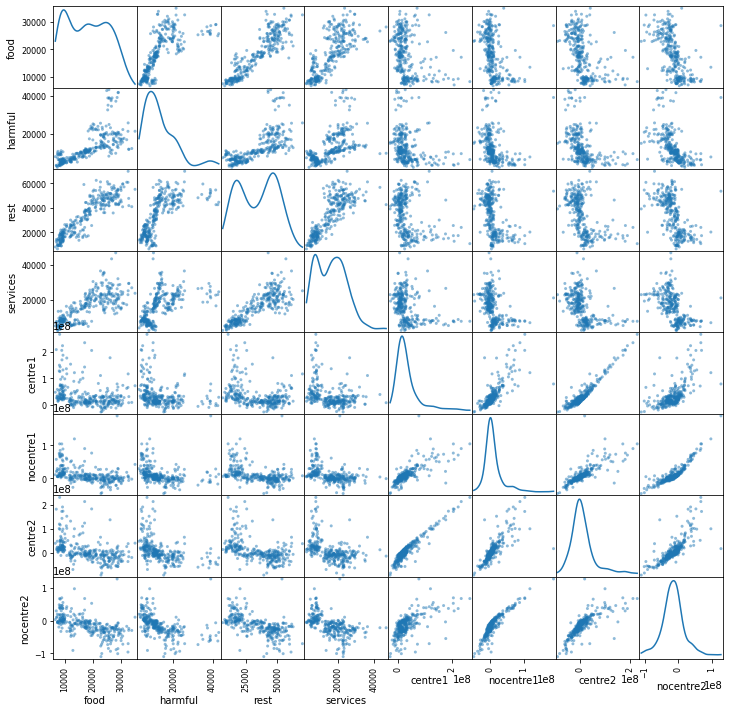

In [37]:
axes = pd.plotting.scatter_matrix(df[use_features], alpha = 0.5, diagonal = 'kde', figsize = (12, 12))

Вполне логично, что чем дороже еда, тем дороже отдых в ресторанах и в кино, видна почти линейная зависимость. Аналогично с каждой парой из списка ['food', 'harmful', 'rest', 'services']. Дороже еда, дороже алкоголь и сигареты. В принципе не всегда должна быть хорошая зависимость у еды и услуг, но она проглядывается. Ниже посмотрим на heatmap и сможем понять все точнее. 
Вполе логична связь и в парах остатков по ипотеке. Чем больше остаток в центре, тем больше и вне центра. Т.к в одном городе по сути есть определенная связь у квартир. А что вызывает вопросы, так это что-то похожее на отрицательную связь стоимость, например еды, и остатков по ипотеке. Казалось бы, чем дороже еда, тем больше цены вообще и тем больше должны быть остатки по ипотеке. **Разберемся со всем с помощью heatmap.**

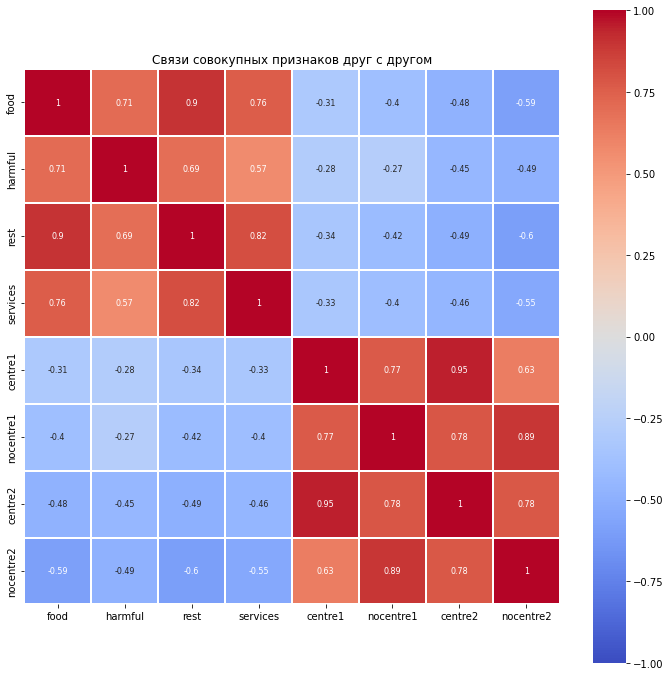

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df[use_features].corr(), cmap='coolwarm',
            vmin=-1, vmax=1, 
            square=True,
            linewidths=0.1,annot_kws={"fontsize":8},
            annot=True)

plt.title('Связи совокупных признаков друг с другом')
plt.show()

Мы видим отличную связь цен на еду и отдыха, ну и всех остальных тоже(про первые 4 признака). Это может говорить о том, что если есть высокие цены, то они высокие в любой отрасли. Мы видим, что коэффицент корреляции остатка по ипотеке вне центра, при оплате вместе с отдыхом равен -0.6. Мы не ошиблись, наблюдается отрицательная связь между первыми 4-мя признаками и оставшимися 4-мя.
О чем это может говорить? Чем выше цены, например на еду, тем выше зарплаты, но тогда и цены на недвижимость должны быть выше. Странно...
Более значимым фактом здесь является разница в ипотечной ставке стран. В Европе достаточно высокие зарплаты и низкие процентные ставки, а в России все наоборот. Давайте убедимся в этом.

In [39]:
df.groupby('Континент')[['Средняя месячная чистая зарплата, после уплаты налогов', 'Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка', 'Цена за м2 на покупку квартиры в центре города']].mean()

,"Средняя месячная чистая зарплата, после уплаты налогов","Процентная ставка по ипотечным кредитам в процентах за 20 лет фиксированной ставки, годовая, фиксированная ставка",Цена за м2 на покупку квартиры в центре города
Континент,,,
africa,94578.100000,9.957857,107170.714286
america,159314.698810,7.250000,253111.858333
asia,101918.241026,5.402427,394278.747619
australia_ocean,260406.066667,4.072000,412502.500000
europe,125306.113810,5.689467,275793.906667
russia,36380.600000,10.138667,117784.266667


Логично, что ежегодная высокая зарплата и низкая ставка дают остаток меньше, чем низкая зарплата с большой ставкой, даже при такой разнице в цене за квадратный метр. Проверим эту логику.

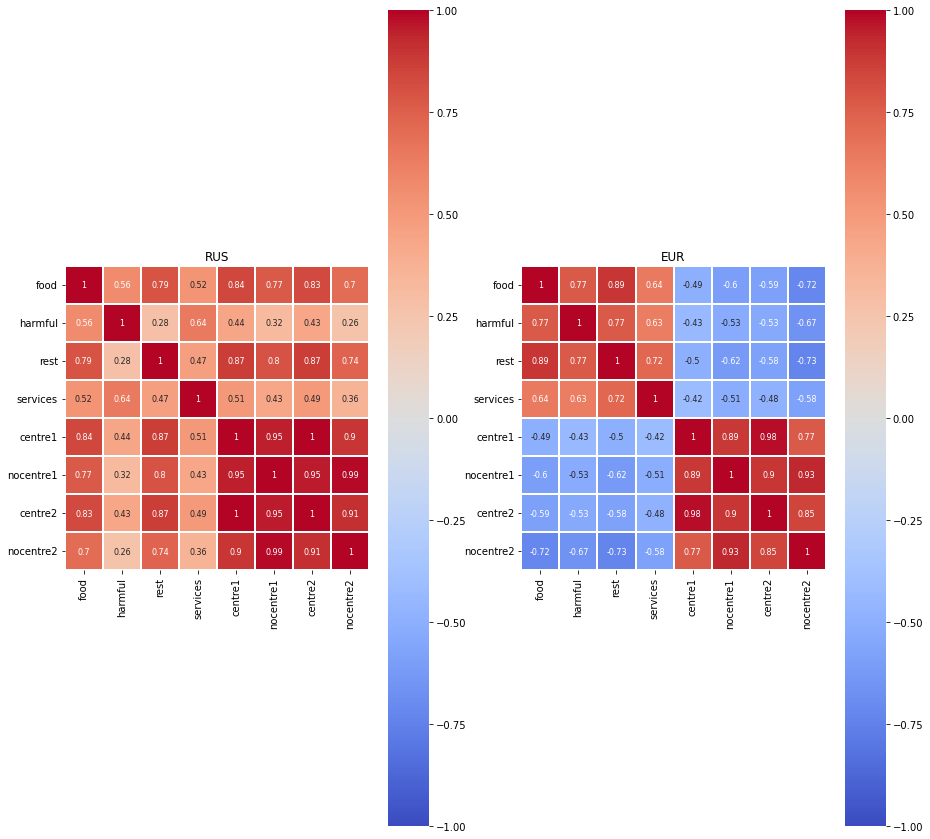

In [40]:
df_rus = df[df['Континент'] == 'russia']
df_europe = df[df['Континент'] == 'europe']

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
sns.heatmap(df_rus[use_features].corr(), cmap='coolwarm',
            vmin=-1, vmax=1, 
            square=True,
            linewidths=0.1,annot_kws={"fontsize":8},
            annot=True)
plt.title('RUS')

plt.subplot(1, 2, 2)
sns.heatmap(df_europe[use_features].corr(), cmap='coolwarm',
            vmin=-1, vmax=1, 
            square=True,
            linewidths=0.1,annot_kws={"fontsize":8},
            annot=True)
plt.title('EUR')

plt.show()

Все вышесказанные предположения подтвердились!!!!! Эти наблюдения можно приобщить  проверке 6-й гипотезе о сравнении качества жизни в России и в остальном мире.

Посмотрим на разницу в континентах при помощи столбчатых диаграмм.

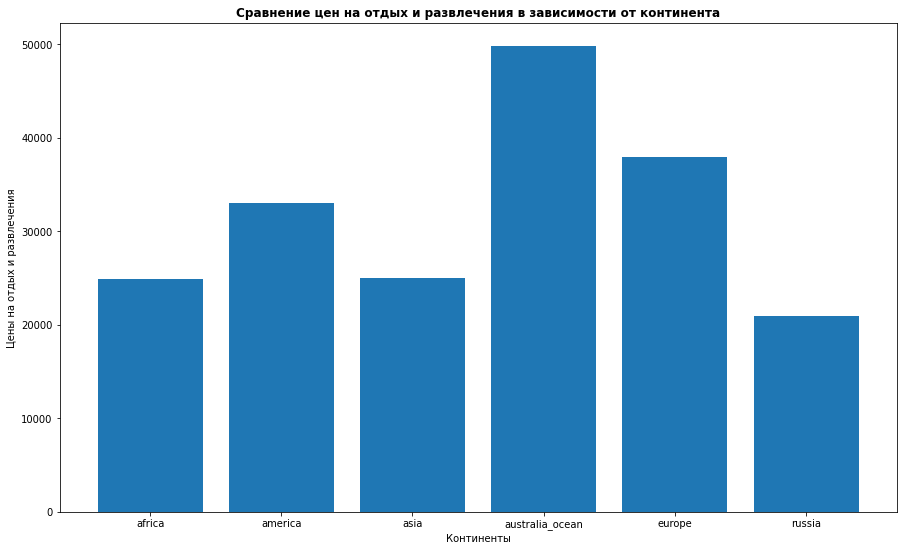

In [41]:
plt.figure(figsize = (15, 9))

plt.bar(df.groupby('Континент')['rest'].mean().reset_index(name='mean')['Континент'],
       df.groupby('Континент')['rest'].mean().reset_index(name='mean')['mean'])

plt.xlabel("Континенты")
plt.ylabel("Цены на отдых и развлечения")
plt.title('Сравнение цен на отдых и развлечения в зависимости от континента',
          fontweight="bold")

plt.show()

В Австралии очень высокие цены на отдых, недвижимость и видимо все остальное. Посмотрим на зарплаты.

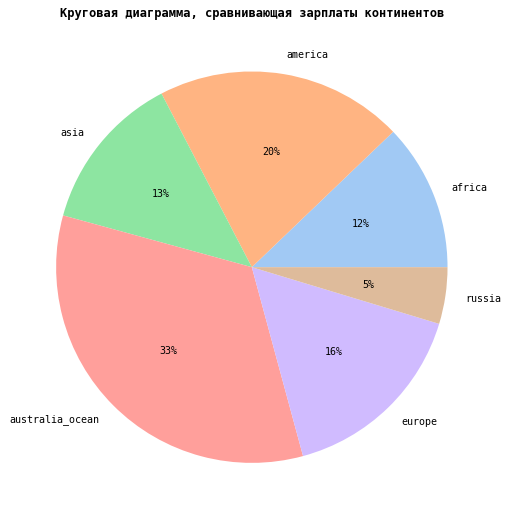

In [42]:
plt.figure(figsize = (15, 9))

colors = sns.color_palette('pastel')[0:6]

plt.pie(df.groupby('Континент')['Средняя месячная чистая зарплата, после уплаты налогов'].mean().reset_index(name='mean')['mean'].values.tolist(),
       labels = df.groupby('Континент')['Средняя месячная чистая зарплата, после уплаты налогов'].mean().reset_index(name='mean')['Континент'].values.tolist(), 
       autopct='%1.0f%%', textprops={'family': 'monospace'}, colors = colors)

plt.title("Круговая диаграмма, сравнивающая зарплаты континентов", family = 'monospace',
          fontweight="bold")

plt.show()

Зарплаты в Австралии самые большие, поэтому высокие цены им не страшны. Если бы все континенты копили на что-то вместе и скидывались по одинаковой сумме, какой-то средней по миру, то России было бы очень тяжело. И вообще после таких наблюдений хочется проверить не являются ли некоторые зарплаты выбросами, если являются, то скорее всего они из России...

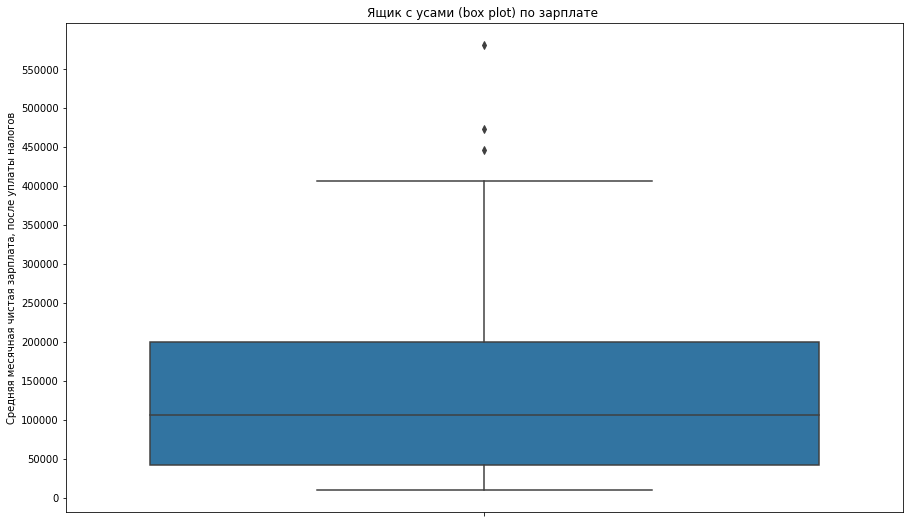

In [43]:
plt.figure(figsize = (15, 9))
sns.boxplot(y = df['Средняя месячная чистая зарплата, после уплаты налогов'], data = df)
plt.yticks(np.arange(0, 600000, step = 50000))

plt.title('Ящик с усами (box plot) по зарплате ')
plt.show()

Фух, слава Богу нет.....

**После получения некоторой информации о данных, перейдем к проверке гипотез!**

### Гипотеза 1
##### Цены на продукты питания в Европе выше, чем на других континентах

In [44]:
df.groupby('Континент')['food'].mean().sort_values()

Континент
russia              9696.133333
africa             11992.590476
asia               17670.289744
america            17953.133333
europe             18978.400952
australia_ocean    26548.600000
Name: food, dtype: float64

Как мы выяснили выше, в Австралии очень высокие цены и зарплаты, ожидаемо, что и цены на еду там выше. Для нас это стало новым фактом, но на втором месте закономерно Европа. Нарисуем столбчатую диаграмму.

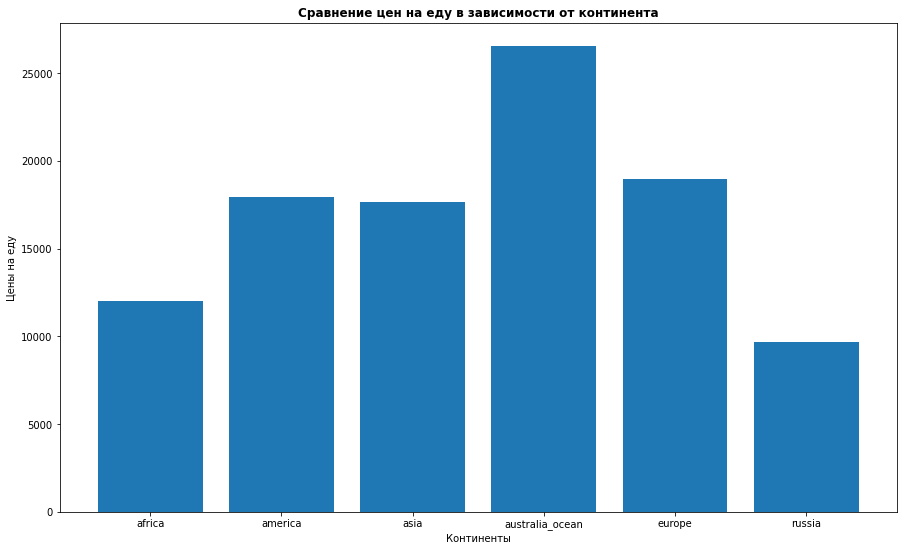

In [45]:
plt.figure(figsize = (15, 9))

plt.bar(df.groupby('Континент')['food'].mean().reset_index(name='mean')['Континент'],
       df.groupby('Континент')['food'].mean().reset_index(name='mean')['mean'])

plt.xlabel("Континенты")
plt.ylabel("Цены на еду")
plt.title('Сравнение цен на еду в зависимости от континента',
          fontweight="bold")

plt.show()

В Европе цены не сильно выше, чем в Америке и Азии, а в России крайне дешево, связанно ли это с качеством продуктов....?
И в итоге **гипотеза 1 оказалась ложной.**

### Гипотеза 2
##### Средняя зарплата зависит от населения

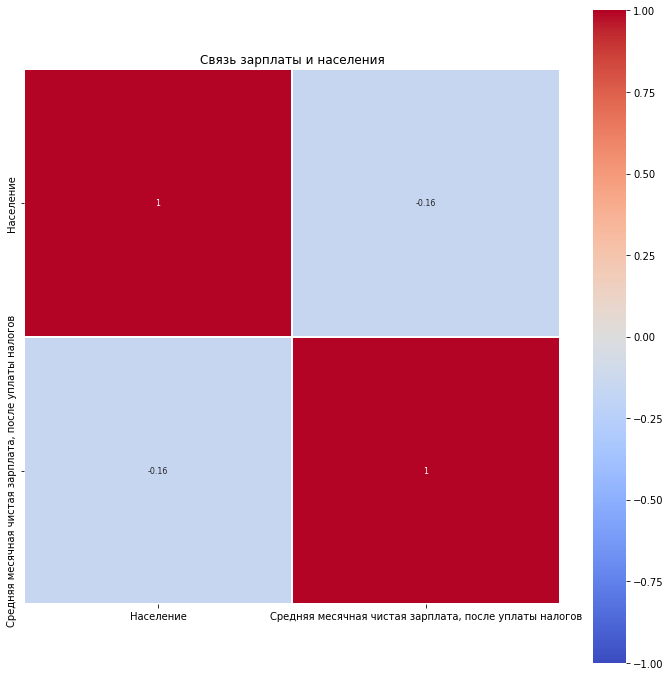

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df[['Население', 'Средняя месячная чистая зарплата, после уплаты налогов']].corr(), cmap='coolwarm',
            vmin=-1, vmax=1, 
            square=True,
            linewidths=0.1,annot_kws={"fontsize":8},
            annot=True)

plt.title('Связь зарплаты и населения')
plt.show()

Wow, вот это поворот...Оказывается, что зарплата и население не то что не зависят сильно, так еще и имеют отрицательную зависимость. Давайте разбираться.

In [47]:
df = df.rename(columns = {'Средняя месячная чистая зарплата, после уплаты налогов': 'З/П'})

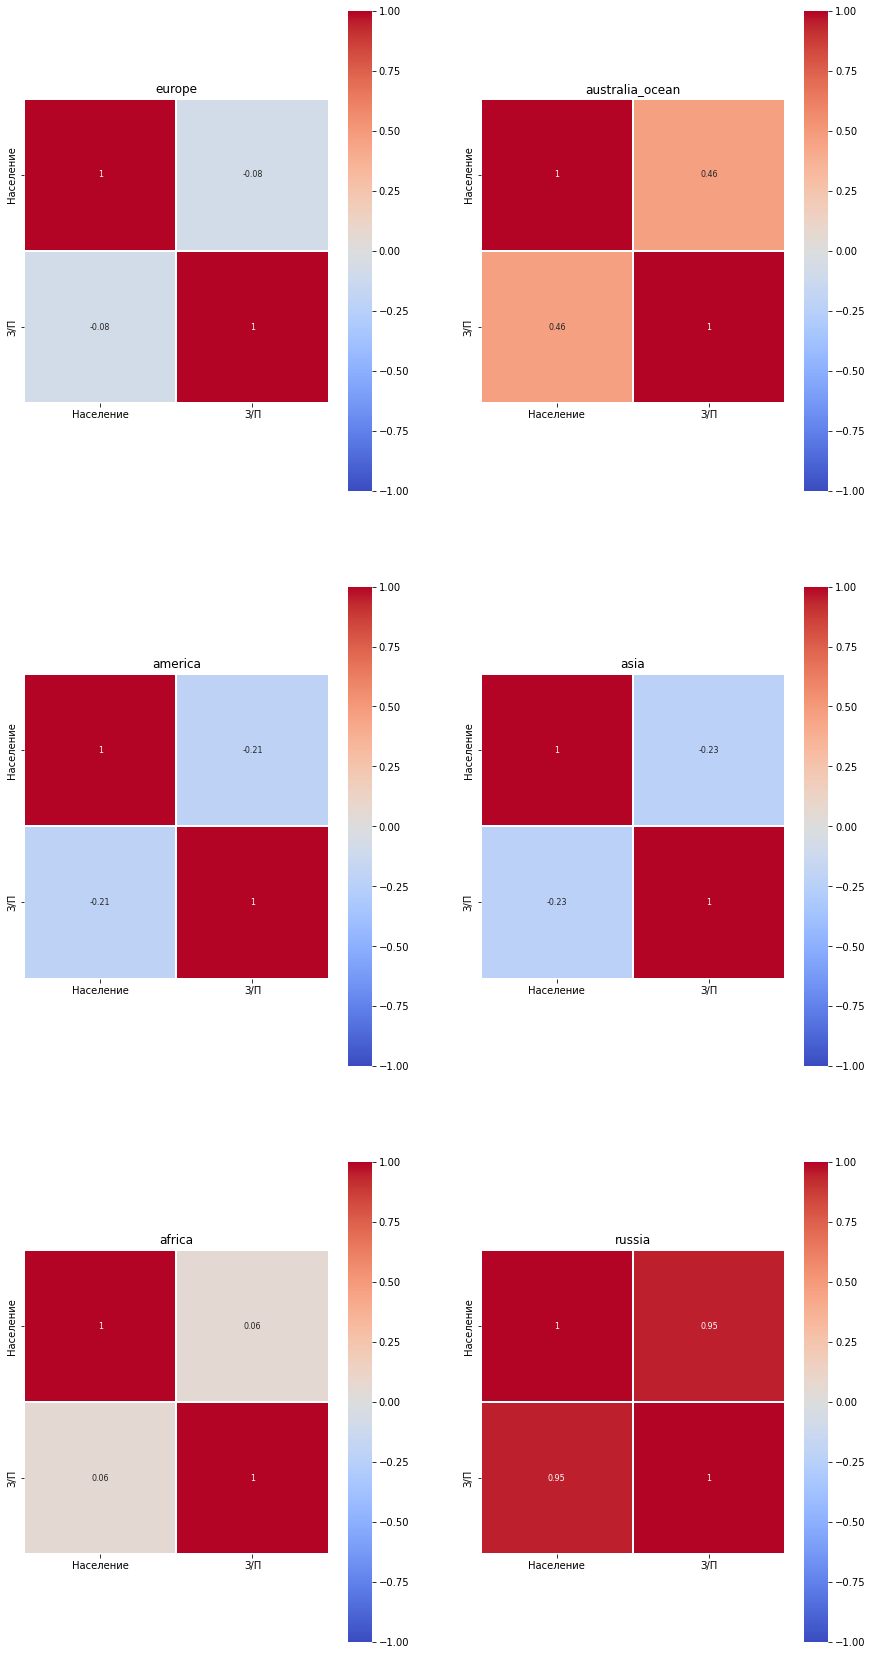

In [48]:
plt.figure(figsize=(15,30))
k = 0
for i in continents:
    df[df['Континент'] == i].index
    plt.subplot(3, 2, k + 1)
    sns.heatmap(df.loc[df[df['Континент'] == i].index, ['Население', 'З/П']].corr(), cmap='coolwarm',
                vmin=-1, vmax=1, 
                square=True,
                linewidths=0.1,annot_kws={"fontsize":8},
                annot=True)
    k += 1
    plt.title(i)

plt.show()

Выделяются три момента:

1) Азия и Америка с большим количеством людей и небольшим количеством денег относительно населения

2) Москва не Россия

3) Что лучше: низкая зависимость между между населением и зарплатами, как в Европе и Африке или наличие некой умеренной зависимости, как в Австралии, что говорит о здоровой доминации мегаполисов? Мы бы ответили, что в Европе лучше.

**Итог: вторая гипотеза ложна везде, но не в России и Австралии.**

### Гипотеза 3
##### Рестораны и развлечения в столицах дороже

In [49]:
df.groupby('Столица')['rest'].mean()

Столица
0    33798.258794
1    38890.700000
Name: rest, dtype: float64

Мы видим, что разница буквально в несколько тысяч рублей, это не так существенно. Снова хочется сравнить континенты.

In [50]:
df.groupby('Столица')['rest'].mean()

Столица
0    33798.258794
1    38890.700000
Name: rest, dtype: float64

In [51]:
df.groupby(['Столица', 'Континент'])['rest'].mean()

Столица  Континент      
0        africa             24763.403650
         america            32679.125000
         asia               24665.105181
         australia_ocean    49473.142857
         europe             37676.052811
         russia             20256.285714
1        africa             26485.000000
         america            38214.250000
         asia               30038.666667
         australia_ocean    54939.000000
         europe             42332.300000
         russia             30094.000000
Name: rest, dtype: float64

На каждом континенте в столицах отдыхать дороже.
Различия не столь существенные, но это только за месяц, давайте посмотрим на разницу за год.

In [52]:
difference = (np.array(df.groupby(['Столица', 'Континент'])['rest'].mean().reset_index(name='mean')[6:12]['mean'].values)
- np.array(df.groupby(['Столица', 'Континент'])['rest'].mean().reset_index(name='mean')[:6]['mean'].values)) * 12

In [53]:
pd.DataFrame({'africa': difference[0], 'america': difference[1], 'asia': difference[2], 'australia_ocean': difference[3], 
'europe': difference[4], 'russia': difference[5]}, index = [0])

,africa,america,asia,australia_ocean,europe,russia
0,20659.156201,66421.5,64482.737834,65590.285714,55874.966262,118052.571429


Так легче представить в чем разница отдыха в столице и в регионе, если смотреть на разницу в России, то за год эта разница составляет 118000. Теперь стало интересно сравнить зарплаты в столице и в регионах на разных континентах.

In [54]:
difference_2 = (np.array(df.groupby(['Столица', 'Континент'])['З/П'].mean().reset_index(name='mean')[6:12]['mean'].values)
- np.array(df.groupby(['Столица', 'Континент'])['З/П'].mean().reset_index(name='mean')[:6]['mean'].values)) * 12
pd.DataFrame({'africa': difference_2[0], 'america': difference_2[1], 'asia': difference_2[2], 'australia_ocean': difference_2[3], 
'europe': difference_2[4], 'russia': difference_2[5]}, index = [0])

,africa,america,asia,australia_ocean,europe,russia
0,114491.571429,367319.586735,359019.758242,257052.0,300976.536735,444952.285714


Разница по зарплате в год существенная, но не стоит забывать о хорошей зависимости продуктов, отдыха, услуг, алкоголя и сигарет. Поэтому цены на них в столице тоже выше, и эта разница в зарплате так или иначе будет уходить на остальное. 

**Итог: Рестораны и развлечения в столицах действительно дороже**

### Гипотеза 4
##### В регионе выплатить ипотеку легче

In [55]:
df.groupby('Столица')[['centre1', 'nocentre1', 'centre2', 'nocentre2']].mean()

,centre1,nocentre1,centre2,nocentre2
Столица,,,,
0,3.131786e+07,8.928121e+06,6.430747e+06,-1.595899e+07
1,7.743573e+07,2.363810e+07,4.836645e+07,-5.431183e+06


При ипотеке на квартиру вне центра и выплат в 2-м в среднем люди погашают эту ипотеку, в остальных случаях нет.
Мы видим, что остаток по ипотеке в регионе всегда меньше. Посмотрим как.

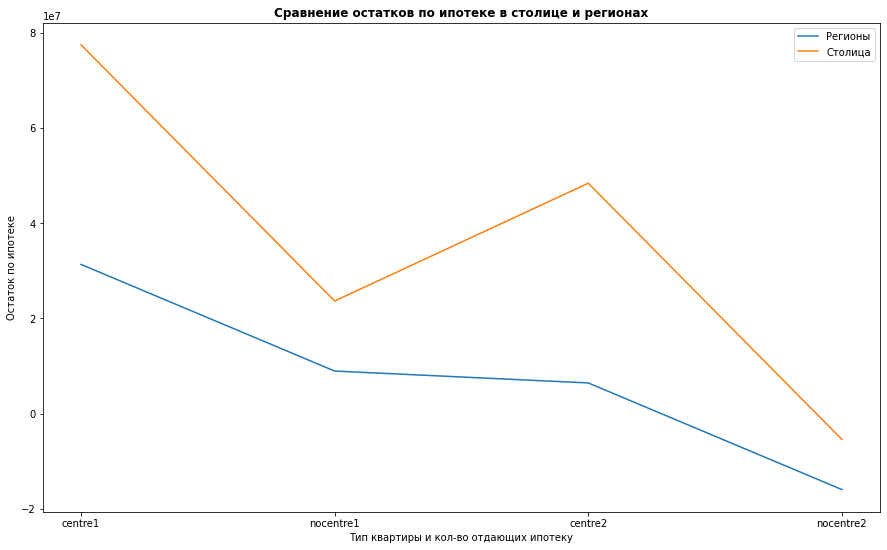

In [56]:
plt.figure(figsize = (15, 9))

plt.plot(df.groupby('Столица')[['centre1', 'nocentre1', 'centre2', 'nocentre2']].mean()[:1].columns.tolist(), 
         df.groupby('Столица')[['centre1', 'nocentre1', 'centre2', 'nocentre2']].mean()[:1].values[0].tolist())
plt.plot(df.groupby('Столица')[['centre1', 'nocentre1', 'centre2', 'nocentre2']].mean()[1:].columns.tolist(), 
         df.groupby('Столица')[['centre1', 'nocentre1', 'centre2', 'nocentre2']].mean()[1:].values[0].tolist())

plt.xlabel("Тип квартиры и кол-во отдающих ипотеку")
plt.ylabel("Остаток по ипотеке")
plt.title('Сравнение остатков по ипотеке в столице и регионах',
          fontweight="bold")
plt.legend(["Регионы", "Столица"], loc ="upper right")

plt.show()

Самые близкие остатки у квартир вне центра, в центре не важно сколько человек выплачивают ипотеку, разница остатков в столице и регионах значительная.
А есть ли страны, которые отличаются от среднего?

In [57]:
df.groupby(['Столица', 'Страна'])['nocentre1'].mean()

Столица  Страна        
0        australia         1.369679e+07
         brazil            1.955220e+07
         canada           -5.759123e+06
         china             2.532482e+07
         france           -7.055689e+05
         germany           6.779758e+05
         greece            6.452188e+06
         india             8.536838e+06
         italy            -6.232692e+05
         japan            -1.769508e+06
         mexico            2.102613e+07
         portugal          1.649223e+06
         russia            1.872888e+07
         south-africa     -8.176012e+05
         spain             1.282304e+06
         sweden           -6.761479e+06
         turkey            4.257747e+07
         ukraine           5.424114e+07
         united-kingdom    1.550212e+06
         united-states    -2.029722e+07
1        australia        -1.014388e+07
         brazil            1.724336e+07
         canada            2.673259e+07
         china             8.926398e+07
         france 

In [58]:
for i in ['centre1', 'nocentre1', 'centre2', 'nocentre2']:
    in_region = np.array(df.groupby(['Столица', 'Страна'])[i].mean().reset_index(name='mean')[:20]['mean'].values)
    in_capitals = np.array(df.groupby(['Столица', 'Страна'])[i].mean().reset_index(name='mean')[20:40]['mean'].values)
    for j in range(20):
        if in_region[j] > in_capitals[j]:
            print(i, df.groupby(['Столица', 'Страна'])[i].mean().reset_index(name='mean').loc[j, 'Страна'])

centre1 australia
centre1 turkey
centre1 united-states
nocentre1 australia
nocentre1 brazil
nocentre1 turkey
nocentre1 united-states
centre2 australia
centre2 brazil
centre2 turkey
centre2 united-states
nocentre2 australia
nocentre2 brazil
nocentre2 turkey
nocentre2 united-states


Да, есть страны, в которых выплатить ипотеку за определенный тип квартир или определенным образом или даже в любом случае в регионе выплатить сложнее. В любом случае: Турция, Австралия.

**Итог: в регионе выплатить ипотеку легче, но не всегда, исключения Турция и Австралия, а в некоторых случаях еще Бразилия и США.**

### Гипотеза 6
##### Цены на сигареты и алкоголь зависят от континента

In [59]:
df.groupby('Континент')['harmful'].mean()

Континент
africa              5841.228571
america            12904.973810
asia               10013.573016
australia_ocean    38575.666667
europe             12788.845714
russia              5293.800000
Name: harmful, dtype: float64

В глаза бросаются низкие цены в России и Африке и заоблачные в Австралии. Построим ящик с усами, чтобы проанализировать этот признак.

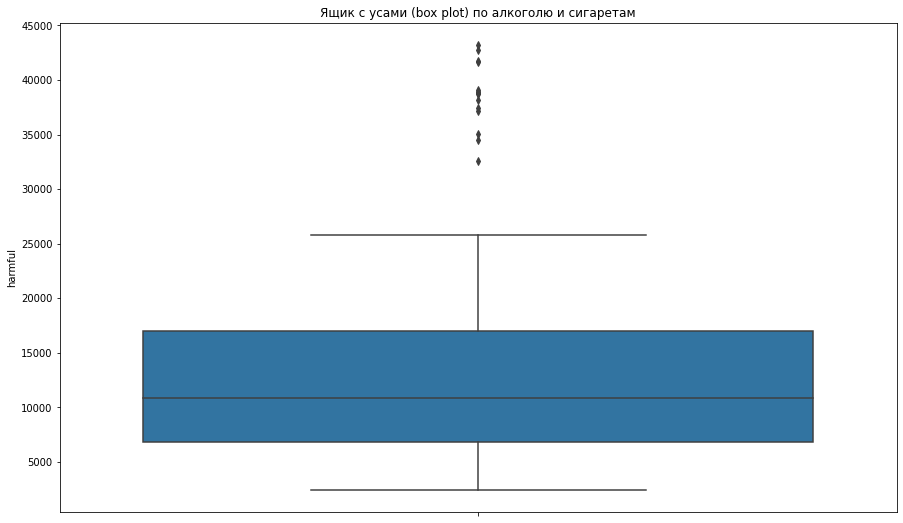

In [60]:
plt.figure(figsize = (15, 9))
sns.boxplot(y = df['harmful'], data = df)

plt.title('Ящик с усами (box plot) по алкоголю и сигаретам')
plt.show()

Мы видим, что наше среднее - чуть больше 10000, Африка и Россия лежат где-то внизу ящика, а сверху выбросы - Австралия.
Посмотрим на процентное соотношение.

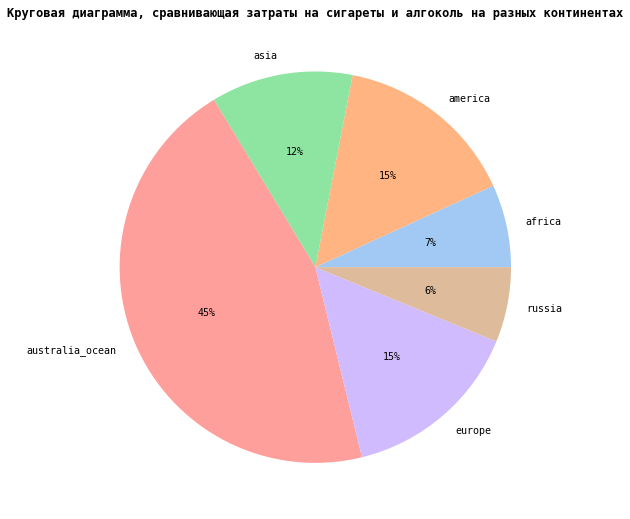

In [61]:
plt.figure(figsize = (15, 9))

colors = sns.color_palette('pastel')[0:6]

plt.pie(np.array(df.groupby('Континент')['harmful'].mean().reset_index(name='mean')['mean'].values.tolist()),
       labels = df.groupby('Континент')['harmful'].mean().reset_index(name='mean')['Континент'].values.tolist(), 
       autopct='%1.0f%%', textprops={'family': 'monospace'}, colors = colors)

plt.title("Круговая диаграмма, сравнивающая затраты на сигареты и алгоколь на разных континентах", family = 'monospace',
          fontweight="bold")

plt.show()

Мы видим, значительную разницу, курить и пить на всех континентах, кроме Австралии стоит столько же, сколько в ней.
Это данные за месяц, посмотрим какая разница за год....

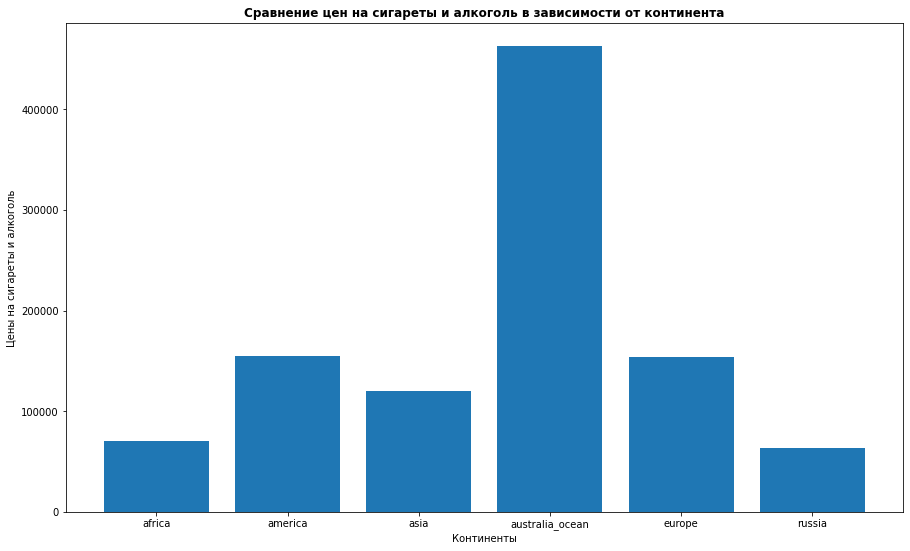

In [62]:
plt.figure(figsize = (15, 9))

plt.bar(df.groupby('Континент')['harmful'].mean().reset_index(name='mean')['Континент'],
       np.array(df.groupby('Континент')['harmful'].mean().reset_index(name='mean')['mean'].values.tolist()) * 12)

plt.xlabel("Континенты")
plt.ylabel("Цены на сигареты и алкоголь")
plt.title('Сравнение цен на сигареты и алкоголь в зависимости от континента',
          fontweight="bold")

plt.show()

Числа достигают почти полумиллиона, о чем это говорит о качестве алкоголя и табака или о политике против вредных привычек?
Затраты у Австралии и России отличаются на 400000...

На всех континентах разные затраты, есть что-то общее между собой у ряда стран и дело не в географическом положении, а в политике государства или качестве продукции. 

**Итог: Да, цены на сигареты и алкоголь зависят от континента.**

### Гипотеза 5
##### В России уровень жизни ниже, чем в других странах(в финансовом плане)

Если опираться на анализ, которые мы провели выше, тот этот факт ну уж очень явно бросается в глаза, что не сходится с нашими изначальными ожиданиями.

**Резюмируя:**

In [63]:
df_rus = df[df['Континент'] == 'russia']
df_others = df[df['Континент'] != 'russia']

In [64]:
(df_rus['З/П'] - (df_rus['food'] + df_rus['harmful'] + df_rus['rest'] + df_rus['services'] + df_rus['З/П'] * 0.2)[:15]).mean()

-15801.853333333333

In [65]:
(df_others['З/П'] - (df_others['food'] + df_others['harmful'] + df_others['rest'] + df_others['services'] + df_others['З/П'] * 0.2)[15:]).mean()

23838.484765234767

Мы видим, что если сложить все основные затраты, включая отдых, развлечения, вредные привычки и ипотеку, то россиянам в среднем не хватает 16000, а в остальных странах какая-то сумма еще остается. Это печально...
Построим распределения этих величин.

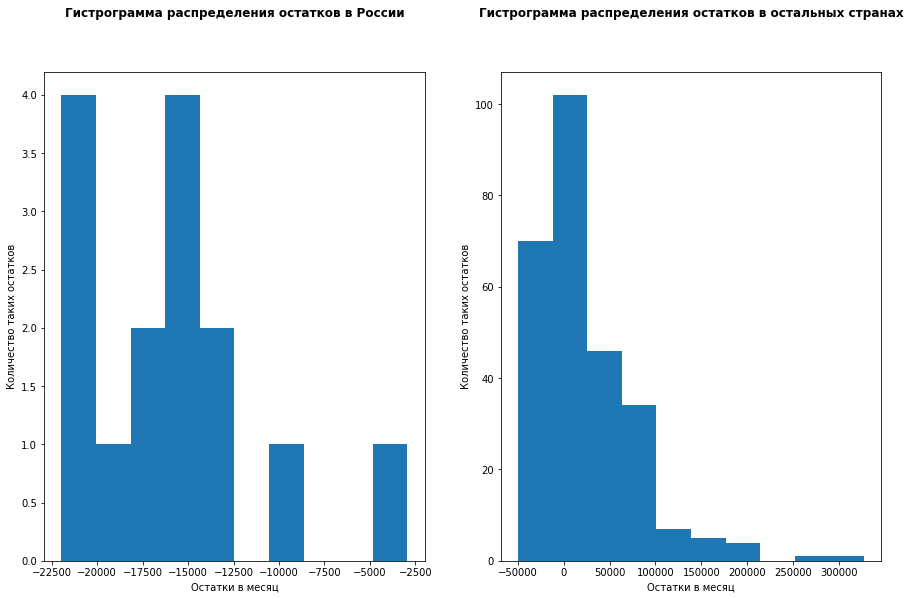

In [66]:
plt.figure(figsize = (15, 9))

plt.subplot(1, 2, 1)
plt.hist((df_rus['З/П'] - (df_rus['food'] + df_rus['harmful'] + df_rus['rest'] + df_rus['services'] + df_rus['З/П'] * 0.2)[:15]))
plt.title("Гистрограмма распределения остатков в России", fontweight="bold", y=1.1)
plt.xlabel("Остатки в месяц")
plt.ylabel("Количество таких остатков")

plt.subplot(1, 2, 2)
plt.hist((df_others['З/П'] - (df_others['food'] + df_others['harmful'] + df_others['rest'] + df_others['services'] + df_others['З/П'] * 0.2)[15:]))
plt.title("Гистрограмма распределения остатков в остальных странах", fontweight="bold", y=1.1)
plt.xlabel("Остатки в месяц")
plt.ylabel("Количество таких остатков")

plt.show()

Можно заметить, что основная масса остатков в России находится за -12500, а в остальных она более менее распределена и уклон в положительную сторону.

**Если брать в расчет все вышестоящие факты: ипотечные остатки, зависимость зарплаты и населения, остатки в месяц, то уровень жизни в России явно отстает и гипотеза 6 подтверждается, но хочется, чтобы так было только пока.**


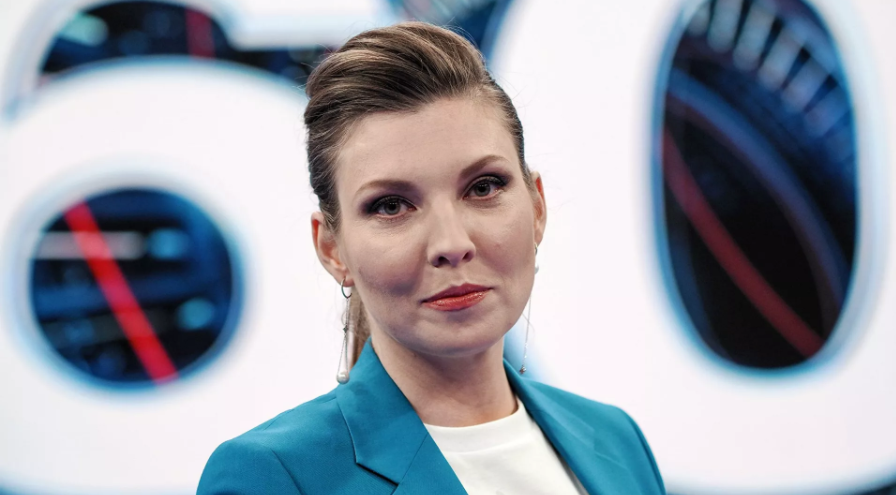